In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import new_func



import warnings
warnings.filterwarnings("ignore")

In [11]:
DATA_DIR = "../ZIPPED_DATASETS/UTKFace"
TRAIN_TEST_SPLIT = 0.8
IMG_SIZE = 128
ID_GENDER_MAP = {0: 'male', 1: 'female'}
GENDER_ID_MAP = dict((g, i) for i, g in ID_GENDER_MAP.items())
ID_RACE_MAP = {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'}
RACE_ID_MAP = dict((r, i) for i, r in ID_RACE_MAP.items())

ID_AGEGROUP_MAP = {0 : 'baby/kid', 1 : 'teenager',\
                   2 : 'young_adult', 3 : 'adult', 4 : 'senior' }
AGEGROUP_ID_MAP = dict((r, i) for i, r in ID_AGEGROUP_MAP.items())
ID_GENDER_MAP, GENDER_ID_MAP, ID_RACE_MAP, RACE_ID_MAP, ID_AGEGROUP_MAP, AGEGROUP_ID_MAP

({0: 'male', 1: 'female'},
 {'male': 0, 'female': 1},
 {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'},
 {'white': 0, 'black': 1, 'asian': 2, 'indian': 3, 'others': 4},
 {0: 'baby/kid', 1: 'teenager', 2: 'young_adult', 3: 'adult', 4: 'senior'},
 {'baby/kid': 0, 'teenager': 1, 'young_adult': 2, 'adult': 3, 'senior': 4})

In [12]:
def parse_filepath(filepath):
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        age, gender, race, _ = filename.split("_")
        return int(age), ID_GENDER_MAP[int(gender)], ID_RACE_MAP[int(race)]
    except Exception as e:
        print(filepath)
        return None, None, None

In [13]:
# create a pandas data frame of images, age, gender and race
files = glob.glob(os.path.join(DATA_DIR, "*.jpg"))

In [14]:
attributes = list(map(parse_filepath, files))

../ZIPPED_DATASETS/UTKFace/39_1_20170116174525125.jpg.chip.jpg
../ZIPPED_DATASETS/UTKFace/61_1_20170109150557335.jpg.chip.jpg
../ZIPPED_DATASETS/UTKFace/61_1_20170109142408075.jpg.chip.jpg


In [15]:
df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['age', 'gender', 'race', 'file']
df = df.dropna()
df.head()

,age,gender,race,file
0,9.0,female,asian,../ZIPPED_DATASETS/UTKFace/9_1_2_2016121920434...
1,36.0,male,black,../ZIPPED_DATASETS/UTKFace/36_0_1_201701171632...
2,86.0,female,white,../ZIPPED_DATASETS/UTKFace/86_1_0_201701202257...
3,26.0,female,white,../ZIPPED_DATASETS/UTKFace/26_1_0_201701161710...
4,1.0,female,asian,../ZIPPED_DATASETS/UTKFace/1_1_2_2016121915461...


In [16]:
def age_group_func(age):
    if age <=9:
        return 'baby/kid'
    if age <=18:
        return 'teenager'
    if age <= 25:
        return 'young_adult'
    if age <= 50:
        return 'adult'
    return 'senior'

In [17]:
df['age_group'] = df['age'].apply(age_group_func)

In [18]:
p = np.random.permutation(len(df))
train_up_to = int(len(df) * TRAIN_TEST_SPLIT)
train_idx = p[:train_up_to]
test_idx = p[train_up_to:]

# split train_idx further into training and validation set
train_up_to = int(train_up_to * 0.7)
train_idx, val_idx = train_idx[:train_up_to], train_idx[train_up_to:]

df['gender_id'] = df['gender'].map(lambda gender: GENDER_ID_MAP[gender])
df['race_id'] = df['race'].map(lambda race: RACE_ID_MAP[race])
df['age_group_id'] = df['age_group'].map(lambda age_group : AGEGROUP_ID_MAP[age_group])
len(train_idx), len(val_idx), len(test_idx)

(13274, 5690, 4741)

In [19]:
df

,age,gender,race,file,age_group,gender_id,race_id,age_group_id
0,9.0,female,asian,../ZIPPED_DATASETS/UTKFace/9_1_2_2016121920434...,baby/kid,1,2,0
1,36.0,male,black,../ZIPPED_DATASETS/UTKFace/36_0_1_201701171632...,adult,0,1,3
2,86.0,female,white,../ZIPPED_DATASETS/UTKFace/86_1_0_201701202257...,senior,1,0,4
3,26.0,female,white,../ZIPPED_DATASETS/UTKFace/26_1_0_201701161710...,adult,1,0,3
4,1.0,female,asian,../ZIPPED_DATASETS/UTKFace/1_1_2_2016121915461...,baby/kid,1,2,0
...,...,...,...,...,...,...,...,...
23703,35.0,male,white,../ZIPPED_DATASETS/UTKFace/35_0_0_201701171551...,adult,0,0,3
23704,52.0,male,indian,../ZIPPED_DATASETS/UTKFace/52_0_3_201701192002...,senior,0,3,4
23705,26.0,male,black,../ZIPPED_DATASETS/UTKFace/26_0_1_201701160101...,adult,0,1,3
23706,28.0,male,black,../ZIPPED_DATASETS/UTKFace/28_0_1_201701170154...,adult,0,1,3


<AxesSubplot:xlabel='age_group', ylabel='age'>

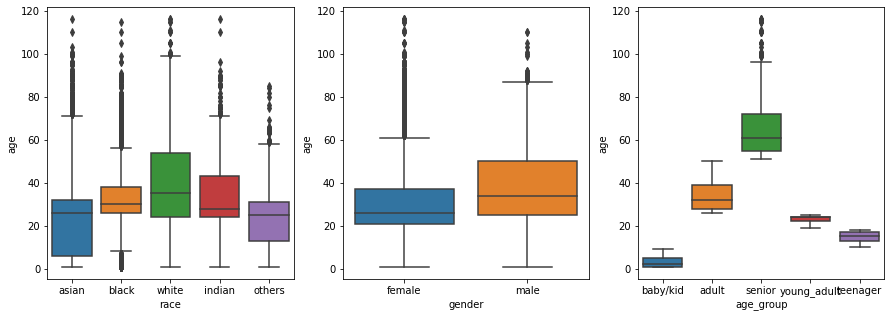

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, x='race', y='age', ax = ax1)
sns.boxplot(data=df, x='gender', y='age', ax = ax2)
sns.boxplot(data=df, x='age_group', y='age', ax = ax3)

<AxesSubplot:xlabel='gender', ylabel='age'>

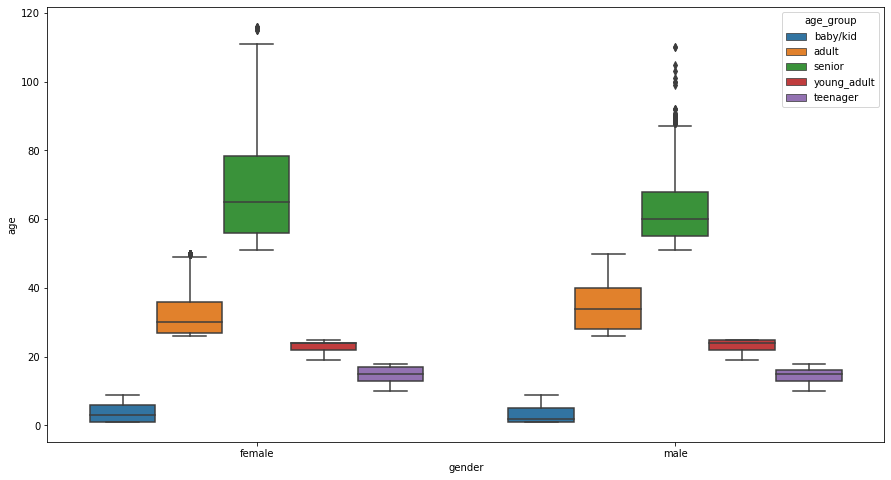

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='gender', y='age', hue='age_group')

In [13]:
from keras.utils import np_utils
from PIL import Image

def get_data_generator(df, indices, for_training, batch_size=16):
    images, age_groups, genders, races = [], [], [], []
    while True:
        for i in indices:
            r = df.iloc[i]
            file, age_group, gender, race = r['file'], r['age_group_id'], r['gender_id'], r['race_id']
            im = new_func.process_img(file, IMG_SIZE)
            images.append(im)
            age_groups.append(np_utils.to_categorical(age_group, len(AGEGROUP_ID_MAP)))
            genders.append(np_utils.to_categorical(gender, len(GENDER_ID_MAP)))
            races.append(np_utils.to_categorical(race, len(RACE_ID_MAP)))
            if len(images) >= batch_size:
                yield np.array(images),  [np.array(age_groups), np.array(genders), np.array(races)]
                images,  age_groups, genders, races = [], [], [], []
        if not for_training:
            break

In [14]:
from keras.layers import Input, Dense, concatenate, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout, Flatten
#from keras.optimizers import SGD
from keras.models import Model
from keras.constraints import maxnorm


def conv2D_layer(in_, filters=32, batch=True, pool=True, dropout=True):
    out_ = Conv2D(filters=filters, kernel_size=3, padding='same', activation='relu', kernel_constraint=maxnorm(3))(in_)
    if batch:
        out_ = BatchNormalization()(out_)
    if pool:
        out_ = MaxPool2D()(out_)
    return out_
    


def mkdir(dir1):
    try:
        os.mkdir(dir1)
    except:
        pass
        

In [15]:
filters = 16
input_image_layer = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='Image_input')

next_layer = conv2D_layer(input_image_layer, filters=filters, batch=False, pool=False)
next_layer = conv2D_layer(next_layer, filters*2)
next_layer = conv2D_layer(next_layer, filters*3)
next_layer = conv2D_layer(next_layer, filters*4)
next_layer = conv2D_layer(next_layer, filters*5)
next_layer = conv2D_layer(next_layer, filters*6)
next_layer = Flatten()(next_layer)
next_layer = Dense(filters*4, activation='relu')(next_layer)

2022-06-16 14:07:27.596591: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# for age_group calculation
age_group = Dense(filters*3, activation='relu')(next_layer)
age_group = Dense(filters*2, activation='relu')(age_group)
age_group = Dense(filters, activation='relu')(age_group)
age_group = Dropout(0.2)(age_group)
age_group_output = Dense(len(AGEGROUP_ID_MAP), activation='softmax', name='age_group_output')(age_group)

In [18]:
# for sex calculation
sex_ = Dense(filters*3, activation='relu')(next_layer)
sex_ = Dense(filters*2, activation='relu')(sex_)
sex_ = Dense(filters, activation='relu')(sex_)
sex_ = Dropout(0.2)(sex_)
sex_output = Dense(len(GENDER_ID_MAP), activation='softmax', name='sex_output')(sex_)

In [19]:
# for race calculation
race_ = Dense(filters*3, activation='relu')(next_layer)
race_ = Dense(filters*2, activation='relu')(race_)
race_ = Dense(filters, activation='relu')(race_)
race_ = Dropout(0.2)(race_)
race_output = Dense(len(RACE_ID_MAP), activation='softmax', name='race_output')(race_)

In [20]:
model = Model(inputs=input_image_layer, outputs=[age_group_output, sex_output, race_output])

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Image_input (InputLayer)       [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['Image_input[0][0]']            
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  4640        ['conv2d[0][0]']                 
                                )                                                             

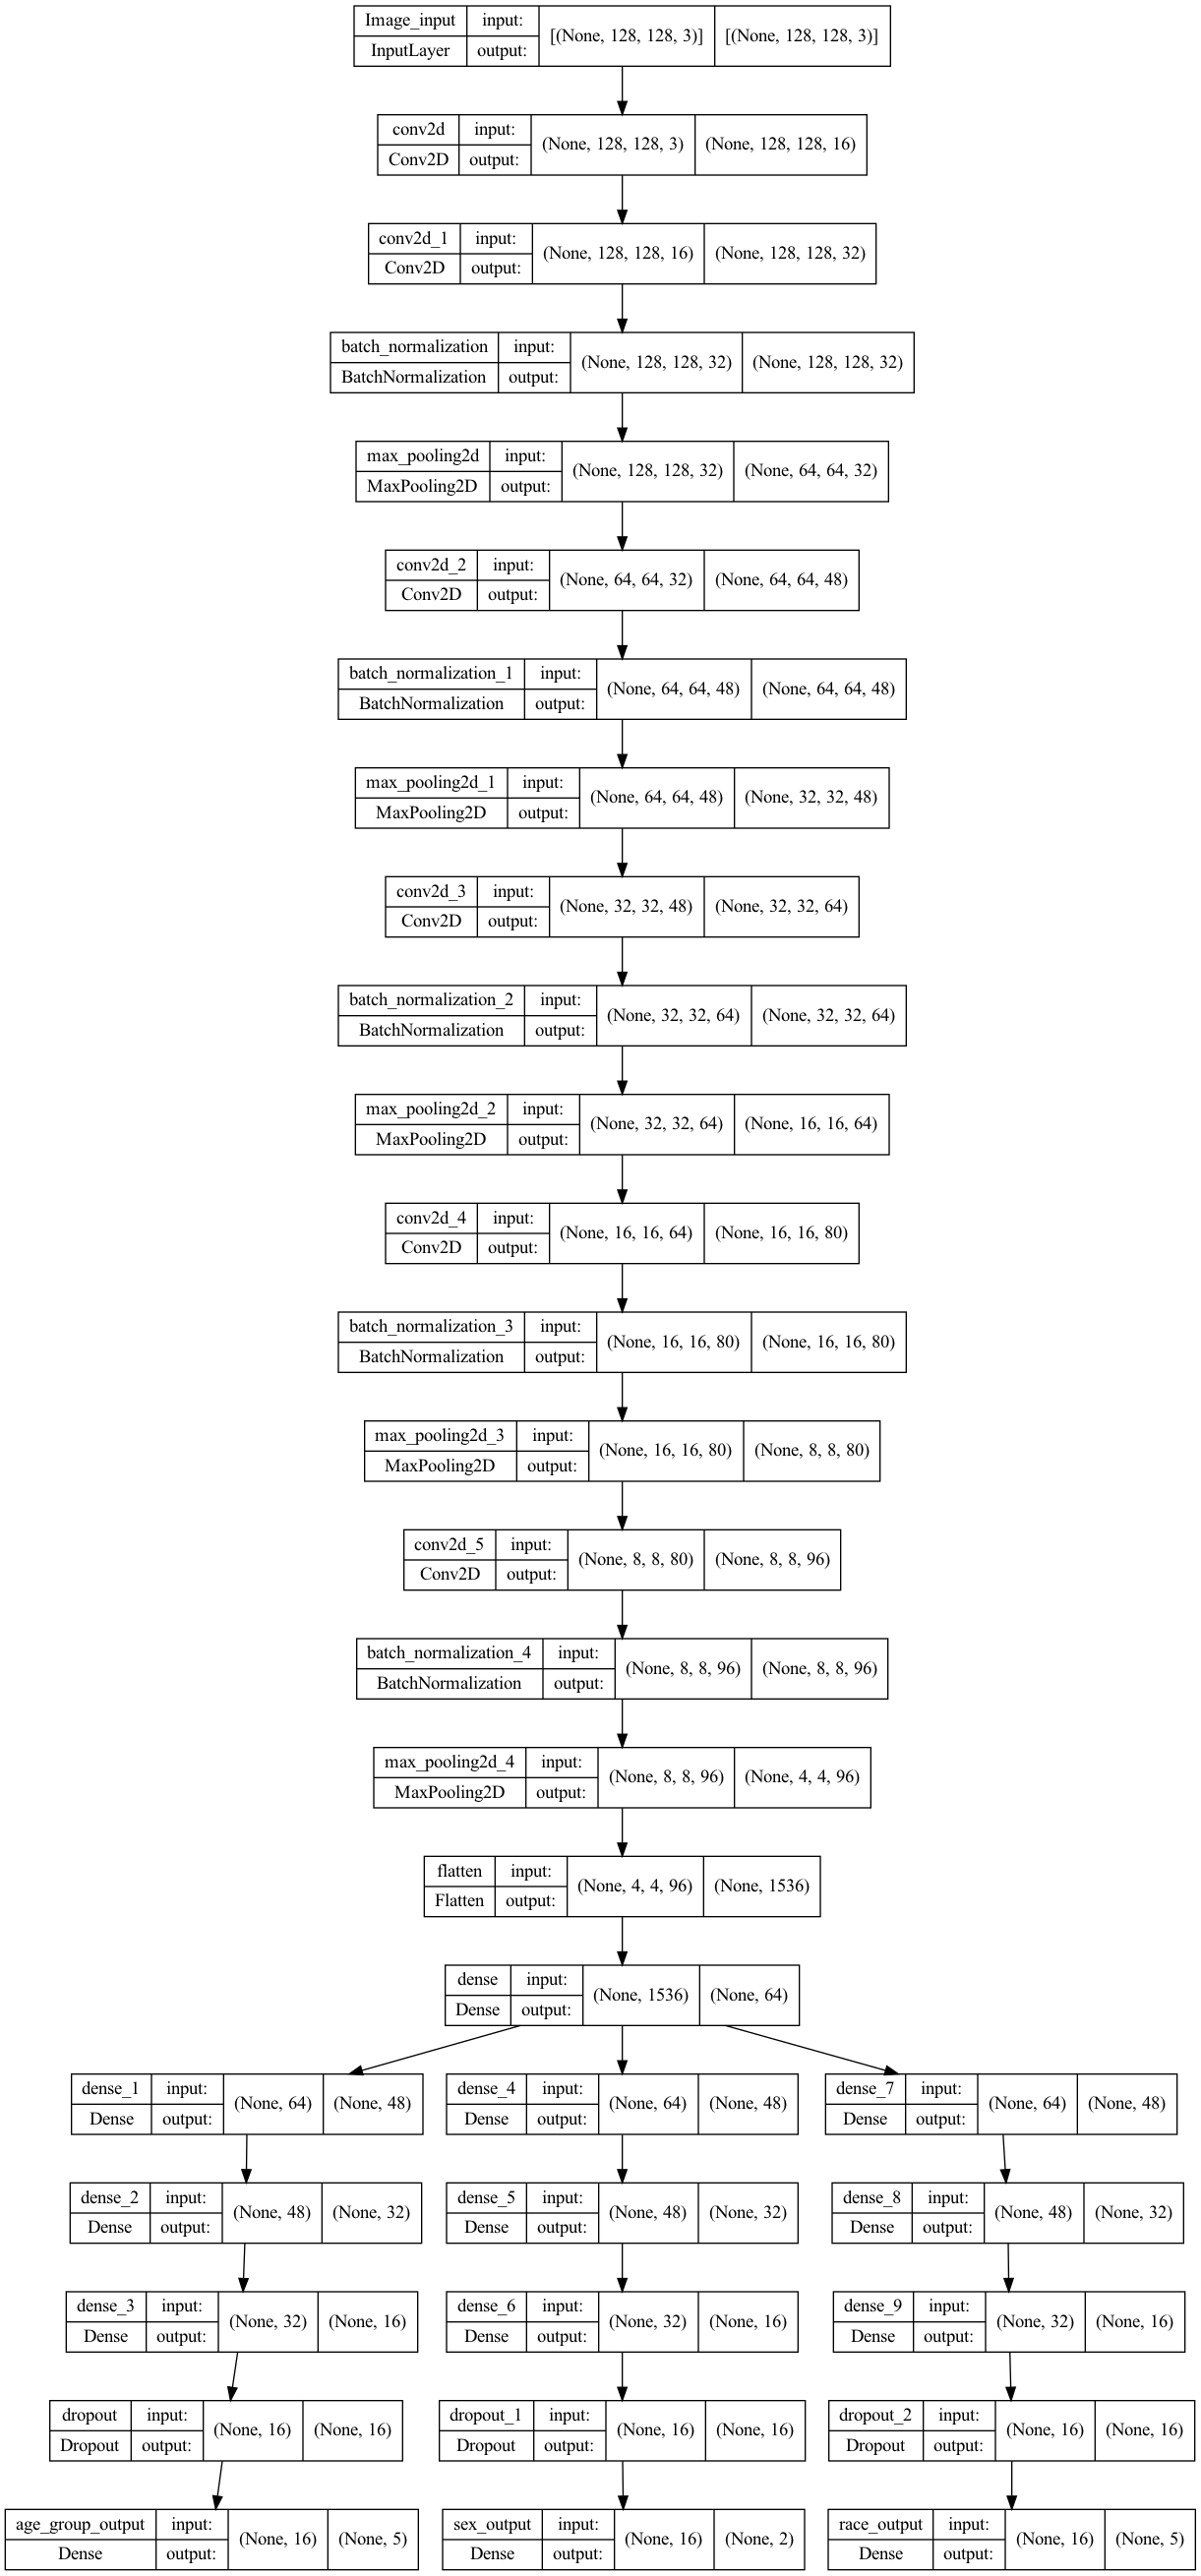

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

import tensorflow as tf
def class_loss(class_weight):
  """Returns a loss function for a specific class weight tensor
  Params:
    class_weight: 1-D constant tensor of class weights
    
  Returns:
    A loss function where each loss is scaled according to the observed class
  """
  def loss(y_obs, y_pred):
    y_obs = tf.dtypes.cast(y_obs, tf.int32)
    hothot = tf.one_hot(tf.reshape(y_obs, [-1]), depth=len(class_weight))
    weight = tf.math.multiply(class_weight, hothot)
    weight = tf.reduce_sum(weight, axis=-1)
    y_obs = tf.convert_to_tensor(y_obs)
    y_pred = tf.convert_to_tensor(y_pred)
    losses = tf.compat.v1.losses.sparse_softmax_cross_entropy(labels=y_obs,
                                                              logits=y_pred,
                                                              weights=weight)
    return losses
  return loss

In [23]:
model.compile(optimizer='adam',
              loss={'age_group_output' : 'categorical_crossentropy',
                    'sex_output': 'categorical_crossentropy',
                    'race_output': 'categorical_crossentropy'},          
              metrics={'age_group_output': 'accuracy',
                       'race_output': 'accuracy',
                       'sex_output': 'accuracy'})

In [24]:
import time 
h5_dir = 'ModelCheckpoint/' 
mkdir(h5_dir)

In [25]:
targets = df.values
save_dir = !pwd
save_dir = save_dir[0]
epochs = 10
batch_size = 64
val_batch_size = 64

In [26]:
from keras.callbacks import ModelCheckpoint


train_gen = get_data_generator(df, train_idx, for_training=True, batch_size=batch_size)
val_gen = get_data_generator(df, val_idx, for_training=True, batch_size=val_batch_size)


checkpoint = ModelCheckpoint(h5_dir + 'val_ep{epoch:02d}.h5',  
                             monitor='val_loss',
                            save_best_only=True,
                            verbose=0)

In [27]:
history = model.fit(train_gen, 
                     epochs=epochs,
                     steps_per_epoch=len(train_idx) // batch_size,
                      validation_data=val_gen,
                      validation_steps=len(val_idx) // batch_size,
                      callbacks = [checkpoint],
                      verbose = 1)

Epoch 1/10
207/207 [==============================] - 14486s 70s/step - loss: 2.9620 - age_group_output_loss: 1.1677 - sex_output_loss: 0.4514 - race_output_loss: 1.3429 - age_group_output_accuracy: 0.5274 - sex_output_accuracy: 0.7727 - race_output_accuracy: 0.4755 - val_loss: 3.4482 - val_age_group_output_loss: 1.3790 - val_sex_output_loss: 0.6644 - val_race_output_loss: 1.4048 - val_age_group_output_accuracy: 0.4885 - val_sex_output_accuracy: 0.5447 - val_race_output_accuracy: 0.4332
Epoch 2/10
207/207 [==============================] - 14539s 71s/step - loss: 2.2012 - age_group_output_loss: 0.8940 - sex_output_loss: 0.3160 - race_output_loss: 0.9912 - age_group_output_accuracy: 0.6431 - sex_output_accuracy: 0.8591 - race_output_accuracy: 0.6476 - val_loss: 2.7312 - val_age_group_output_loss: 1.2257 - val_sex_output_loss: 0.3628 - val_race_output_loss: 1.1426 - val_age_group_output_accuracy: 0.5625 - val_sex_output_accuracy: 0.8335 - val_race_output_accuracy: 0.5472
Epoch 3/10
207/2

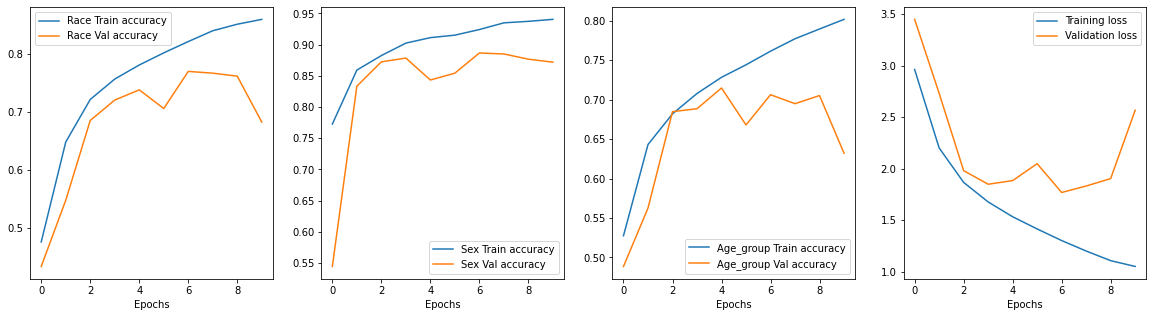

In [28]:
def  plot_train_history(history):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].plot(history.history['race_output_accuracy'], label='Race Train accuracy')
    axes[0].plot(history.history['val_race_output_accuracy'], label='Race Val accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].legend()
    
    axes[1].plot(history.history['sex_output_accuracy'], label='Sex Train accuracy')
    axes[1].plot(history.history['val_sex_output_accuracy'], label='Sex Val accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].legend()
    
    axes[2].plot(history.history['age_group_output_accuracy'], label='Age_group Train accuracy')
    axes[2].plot(history.history['val_age_group_output_accuracy'], label='Age_group Val accuracy')
    axes[2].set_xlabel('Epochs')
    axes[2].legend()


    axes[3].plot(history.history['loss'], label='Training loss')
    axes[3].plot(history.history['val_loss'], label='Validation loss')
    axes[3].set_xlabel('Epochs')
    axes[3].legend()
    

plot_train_history(history)

In [29]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
dict(zip(model.metrics_names, model.evaluate(test_gen, steps=len(test_idx)//128)))

37/37 [==============================] - 3583s 100s/step - loss: 2.6492 - age_group_output_loss: 1.1886 - sex_output_loss: 0.4095 - race_output_loss: 1.0512 - age_group_output_accuracy: 0.6087 - sex_output_accuracy: 0.8630 - race_output_accuracy: 0.6829


{'loss': 2.649245023727417,
 'age_group_output_loss': 1.188601016998291,
 'sex_output_loss': 0.4094756245613098,
 'race_output_loss': 1.051168441772461,
 'age_group_output_accuracy': 0.6087415814399719,
 'sex_output_accuracy': 0.8629645109176636,
 'race_output_accuracy': 0.6828547120094299}

In [30]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
x_test, (age_group_true, gender_true, race_true)= next(test_gen)
age_group_pred, gender_pred, race_pred = model.predict_on_batch(x_test)

In [31]:
age_group_true, gender_true, race_true = age_group_true.argmax(axis=-1), gender_true.argmax(axis=-1), race_true.argmax(axis=-1)
age_group_pred, gender_pred, race_pred = age_group_pred.argmax(axis=-1), gender_pred.argmax(axis=-1), race_pred.argmax(axis=-1)

In [32]:
from sklearn.metrics import classification_report

print("Classification report for age_group")
print(classification_report(age_group_true, age_group_pred))

print("Classification report for race")
print(classification_report(race_true, race_pred))

print("\nClassification report for gender")
print(classification_report(gender_true, gender_pred))

Classification report for age_group
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.67      0.22      0.33         9
           2       0.33      0.20      0.25        15
           3       0.64      0.57      0.60        51
           4       0.51      0.83      0.63        30

    accuracy                           0.62       128
   macro avg       0.62      0.55      0.55       128
weighted avg       0.63      0.62      0.61       128

Classification report for race
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        63
           1       0.68      0.96      0.79        24
           2       0.70      0.50      0.58        14
           3       0.80      0.21      0.33        19
           4       0.40      0.25      0.31         8

    accuracy                           0.72       128
   macro avg       0.67      0.56      0.57       128
weighted a

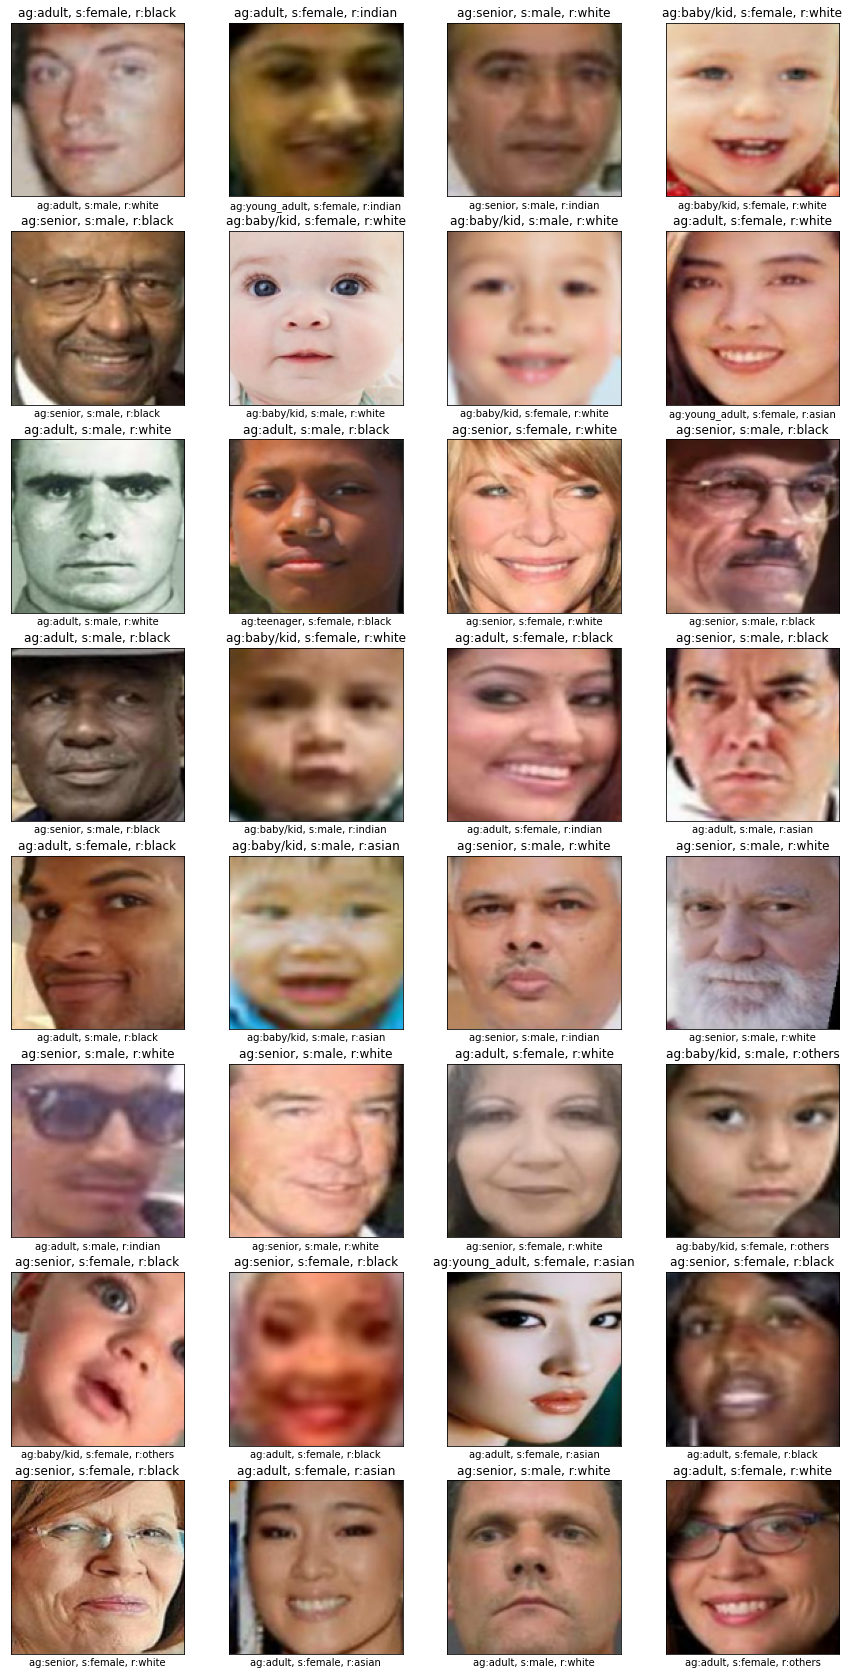

In [33]:
import math
n = 32
random_indices = np.random.permutation(n)
n_cols = 4
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 30))
for i, img_idx in enumerate(random_indices):
    ax = axes.flat[i]
    ax.imshow(x_test[img_idx])
    ax.set_title('ag:{}, s:{}, r:{}'.format(ID_AGEGROUP_MAP[age_group_pred[img_idx]], \
                                                  ID_GENDER_MAP[gender_pred[img_idx]], \
                                                  ID_RACE_MAP[race_pred[img_idx]]))
    ax.set_xlabel('ag:{}, s:{}, r:{}'.format(ID_AGEGROUP_MAP[age_group_true[img_idx]],\
                                                   ID_GENDER_MAP[gender_true[img_idx]],\
                                                   ID_RACE_MAP[race_true[img_idx]]))
    ax.set_xticks([])
    ax.set_yticks([])  

In [34]:
filename = 'model.h5'
model.save(filename)

### Next, estimate the age of face images


In [32]:
import cv2 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import new_func3


from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold
import math
import new_func

In [23]:
from keras.models import load_model

In [24]:
model = load_model('model.h5')

In [25]:
DATA_DIR = "../ZIPPED_DATASETS/UTKFace"

In [26]:
# create a pandas data frame of images, age, gender and race
files = glob.glob(os.path.join(DATA_DIR, "*.jpg"))
files[0]

'../ZIPPED_DATASETS/UTKFace/9_1_2_20161219204347420.jpg.chip.jpg'

In [27]:
IMG_SIZE = 128
all_vals = []
targets = []
for file in files:
    targets.append(int(file.split('/')[3].split('_')[0]))
    all_vals.append(new_func3.process_img(file, IMG_SIZE))

/Users/likedream/Documents/Images/Codes/new_func3.py:15: RuntimeWarning: invalid value encountered in true_divide
  image = (image - image.mean()) / image.std()
/Users/likedream/Documents/Images/Codes/new_func3.py:44: RuntimeWarning: invalid value encountered in true_divide
  img2 = (img2 - img2.mean()) / img2.std()


In [28]:
age_df = pd.DataFrame(all_vals, columns = ['X' + str(i) for i in range(all_vals[0].shape[0])])
age_df['age'] = targets

In [29]:
def get_data_pred(df, files, batch_size=32):
    images = []
    while True:
        for file in files:
            im = new_func.process_img(file, IMG_SIZE)
            images.append(im)
            if len(images) >= batch_size:
                yield np.array(images)
                images = []
        yield np.array(images)

In [30]:
batch_size=32
num = math.ceil(len(files)/batch_size)

In [33]:
age_group = []
gender = []
race = []
gen  = get_data_pred(df, files)
for i in range(num):
    test = next(gen)
    pred1, pred2, pred3 = model.predict_on_batch(test)
    pred1, pred2, pred3 = pred1.argmax(axis=-1), pred2.argmax(axis=-1), pred3.argmax(axis=-1)
    age_group.extend(pred1)
    gender.extend(pred2)
    race.extend(pred3)

In [34]:
len(files), len(age_group), len(gender), len(race)

(23708, 23708, 23708, 23708)

In [35]:
age_df['age_group'] = [str(i) for i in age_group[:len(files)]]

In [36]:
age_df['gender'] = [str(i) for i in gender[:len(files)]]

In [37]:
age_df['race'] = [str(i) for i in race[:len(files)]]

In [38]:
age_df = age_df.dropna()

In [39]:
age_df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X570,X571,X572,X573,X574,X575,age,age_group,gender,race
0,-0.141139,0.000000e+00,-0.141139,0.000000e+00,-0.141139,0.000000e+00,-0.141139,0.000000e+00,-0.141139,0.000000e+00,...,-0.298298,2.027858e-04,-0.298334,1.110223e-16,-0.298335,2.190169e-06,9,3,1,2
1,0.225565,1.302901e+00,0.303049,1.383360e+00,0.186823,1.258961e+00,-0.278079,1.110223e-16,-0.278079,1.110223e-16,...,1.611929,1.711901e-01,1.583466,7.286674e-03,1.520782,7.143610e-02,36,3,0,1
3,-0.152003,0.000000e+00,-0.152003,0.000000e+00,-0.152003,0.000000e+00,-0.152003,0.000000e+00,-0.152003,0.000000e+00,...,-0.072951,2.775558e-17,-0.072951,2.775558e-17,-0.072951,2.775558e-17,26,3,1,0
5,-0.267619,5.551115e-17,-0.267619,5.551115e-17,-0.267619,5.551115e-17,-0.267619,5.551115e-17,-0.267619,5.551115e-17,...,-0.033430,4.056674e-01,0.350699,1.303375e+00,4.080029,3.388536e+00,52,4,0,0
6,-0.264199,1.110223e-16,0.140725,1.214769e+00,-0.264199,1.110223e-16,-0.264199,1.110223e-16,-0.264199,1.110223e-16,...,-0.210592,4.323812e-01,0.674590,1.485575e+00,-0.128594,7.736415e-01,25,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23703,0.150115,1.230977e+00,-0.137112,6.999632e-01,-0.260210,5.551115e-17,-0.260210,5.551115e-17,-0.260210,5.551115e-17,...,-0.080234,2.775558e-17,-0.080234,2.775558e-17,-0.080234,2.775558e-17,35,3,0,0
23704,0.199088,1.343992e+00,0.293013,1.469420e+00,-0.223578,0.000000e+00,-0.223578,0.000000e+00,-0.223578,0.000000e+00,...,-0.207832,1.205964e-14,0.224815,1.240615e+00,1.921665,2.393093e+00,52,4,0,3
23705,0.109619,1.162711e+00,-0.277951,1.110223e-16,-0.277951,1.110223e-16,-0.277951,1.110223e-16,-0.277951,1.110223e-16,...,0.111930,6.492806e-01,-0.264159,3.851658e-02,0.979113,1.587135e+00,26,3,0,1
23706,-0.048540,9.288473e-01,0.601978,1.520018e+00,0.293838,1.315372e+00,-0.288204,3.406615e-01,-0.322442,5.551115e-17,...,-0.273585,7.887296e-02,-0.269522,1.341461e-08,0.964190,1.744460e+00,28,3,0,1


In [40]:
age_df = pd.get_dummies(age_df, prefix=['age_group', 'gender', 'race'])
age_df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,age_group_2,age_group_3,age_group_4,gender_0,gender_1,race_0,race_1,race_2,race_3,race_4
0,-0.141139,0.000000e+00,-0.141139,0.000000e+00,-0.141139,0.000000e+00,-0.141139,0.000000e+00,-0.141139,0.000000e+00,...,0,1,0,0,1,0,0,1,0,0
1,0.225565,1.302901e+00,0.303049,1.383360e+00,0.186823,1.258961e+00,-0.278079,1.110223e-16,-0.278079,1.110223e-16,...,0,1,0,1,0,0,1,0,0,0
3,-0.152003,0.000000e+00,-0.152003,0.000000e+00,-0.152003,0.000000e+00,-0.152003,0.000000e+00,-0.152003,0.000000e+00,...,0,1,0,0,1,1,0,0,0,0
5,-0.267619,5.551115e-17,-0.267619,5.551115e-17,-0.267619,5.551115e-17,-0.267619,5.551115e-17,-0.267619,5.551115e-17,...,0,0,1,1,0,1,0,0,0,0
6,-0.264199,1.110223e-16,0.140725,1.214769e+00,-0.264199,1.110223e-16,-0.264199,1.110223e-16,-0.264199,1.110223e-16,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23703,0.150115,1.230977e+00,-0.137112,6.999632e-01,-0.260210,5.551115e-17,-0.260210,5.551115e-17,-0.260210,5.551115e-17,...,0,1,0,1,0,1,0,0,0,0
23704,0.199088,1.343992e+00,0.293013,1.469420e+00,-0.223578,0.000000e+00,-0.223578,0.000000e+00,-0.223578,0.000000e+00,...,0,0,1,1,0,0,0,0,1,0
23705,0.109619,1.162711e+00,-0.277951,1.110223e-16,-0.277951,1.110223e-16,-0.277951,1.110223e-16,-0.277951,1.110223e-16,...,0,1,0,1,0,0,1,0,0,0
23706,-0.048540,9.288473e-01,0.601978,1.520018e+00,0.293838,1.315372e+00,-0.288204,3.406615e-01,-0.322442,5.551115e-17,...,0,1,0,1,0,0,1,0,0,0


In [41]:
df_train, df_test = train_test_split(age_df, test_size=0.2, random_state= 123, shuffle=True)

In [42]:
alphas = [0.000001,.00001,.0001,.001,.01,.1,.25,.5,.75,1,5,10,25,50,100,1000,10000]
features = [col for col in df_train.columns\
            if (col != 'age')  and  not(col.startswith('age'))\
            and not(col.startswith('gender')) and not(col.startswith('race'))]

## make coefficient holder
coefs = np.zeros((len(alphas), len(features)))

## scale quantitative variables
df_array = df_train[features].to_numpy()


## Loop through alphas
for i in range(len(alphas)):
    ## make lasso model
    lasso = Lasso(alpha=alphas[i], max_iter=10000000)
    
    
    ## fit model
    lasso.fit(df_array, df_train.age.values)
    
    ## record coefs
    coefs[i,:] = lasso.coef_
    

In [43]:
tt = pd.DataFrame(coefs, index=alphas, columns=features)

In [44]:
for ind in range(len(tt)):
    if len(tt.iloc[ind][(tt.iloc[ind] != 0)].to_list()) <= 200:
        break
best_cols = tt.iloc[ind][tt.iloc[ind] != 0].index.to_list()

In [45]:
best_cols.extend(['age_group_' + str(i) for i in range(5)])
best_cols.extend(['gender_0', 'gender_1'])
best_cols.extend(['race_' + str(i) for i in range(5)])

In [46]:
best_cols

['X15',
 'X25',
 'X33',
 'X35',
 'X37',
 'X39',
 'X41',
 'X47',
 'X50',
 'X51',
 'X53',
 'X56',
 'X57',
 'X59',
 'X61',
 'X63',
 'X64',
 'X65',
 'X67',
 'X68',
 'X71',
 'X73',
 'X76',
 'X79',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X90',
 'X91',
 'X93',
 'X95',
 'X99',
 'X103',
 'X104',
 'X105',
 'X107',
 'X111',
 'X112',
 'X113',
 'X123',
 'X125',
 'X127',
 'X129',
 'X133',
 'X135',
 'X137',
 'X141',
 'X143',
 'X151',
 'X152',
 'X157',
 'X158',
 'X161',
 'X163',
 'X165',
 'X167',
 'X169',
 'X171',
 'X173',
 'X175',
 'X176',
 'X179',
 'X180',
 'X183',
 'X185',
 'X193',
 'X195',
 'X197',
 'X199',
 'X201',
 'X202',
 'X204',
 'X209',
 'X211',
 'X213',
 'X221',
 'X222',
 'X223',
 'X230',
 'X232',
 'X233',
 'X235',
 'X239',
 'X241',
 'X247',
 'X249',
 'X251',
 'X255',
 'X259',
 'X261',
 'X264',
 'X267',
 'X269',
 'X271',
 'X273',
 'X275',
 'X277',
 'X279',
 'X281',
 'X283',
 'X285',
 'X287',
 'X288',
 'X289',
 'X290',
 'X294',
 'X297',
 'X307',
 'X310',
 'X311',
 'X313',
 'X314',
 'X315',

In [47]:
kfold = KFold(n_splits=5, shuffle=True, random_state=5643)

cv_mses_baseline= np.zeros(kfold.n_splits)
cv_mses_lr = np.zeros(kfold.n_splits)
cv_mses_xgb = np.zeros(kfold.n_splits)
cv_mses_rfr = np.zeros(kfold.n_splits)
cv_mses_svr = np.zeros(kfold.n_splits)



i = 0
for train_index, test_index in kfold.split(df_train):
    df_tt = df_train.iloc[train_index]
    df_ho = df_train.iloc[test_index]

    
    train_mean = df_tt.age.mean()
    cv_mses_baseline[i] = mse(df_ho.age, train_mean*np.ones(len(df_ho)))

    slr = LinearRegression(copy_X = True)        
    slr.fit(df_tt[best_cols], df_tt.age)
    cv_mses_lr[i] = mse(df_ho.age, slr.predict(df_ho[best_cols]))


    rfr = RandomForestRegressor(n_estimators=200, random_state= 1234)        
    rfr.fit(df_tt[best_cols], df_tt.age)
    cv_mses_rfr[i] = mse(df_ho.age, rfr.predict(df_ho[best_cols]))


    xgb = XGBRegressor(random_state=4321)
    xgb.fit(df_tt[best_cols], df_tt.age)
    cv_mses_xgb[i] = mse(df_ho.age, xgb.predict(df_ho[best_cols]))

    svr = SVR()
    svr.fit(df_tt[best_cols], df_tt.age)
    cv_mses_svr[i] = mse(df_ho.age, svr.predict(df_ho[best_cols]))

        
        
    print('Done with split ' + str(i) )
    i = i + 1

Done with split 0
Done with split 1
Done with split 2
Done with split 3
Done with split 4


In [48]:
cv_mses_baseline

array([392.34629446, 406.95610541, 384.12753146, 385.06000508,
       401.55250745])

In [49]:
cv_mses_lr

array([143.05419785, 143.96569784, 141.74981778, 142.42670548,
       141.80927236])

In [50]:
cv_mses_rfr

array([117.48623718, 121.6663927 , 125.6726024 , 122.37622666,
       121.34670331])

In [51]:
cv_mses_xgb

array([124.98485415, 128.43380259, 130.9437392 , 127.4505485 ,
       124.88207714])

In [52]:
cv_mses_svr

array([181.39845283, 183.54203325, 179.13059581, 172.44739876,
       184.740605  ])

In [53]:
rfr = RandomForestRegressor(n_estimators=200, random_state= 4321) 
rfr.fit(df_train[best_cols], df_train.age)

RandomForestRegressor(n_estimators=200, random_state=4321)

In [54]:
pred = rfr.predict(df_test[best_cols])

In [55]:
mse(pred, df_test.age)

122.78226640557158

In [56]:
import joblib
filename = 'finalized_model.joblib'
joblib.dump([rfr, best_cols], filename)

['finalized_model.joblib']

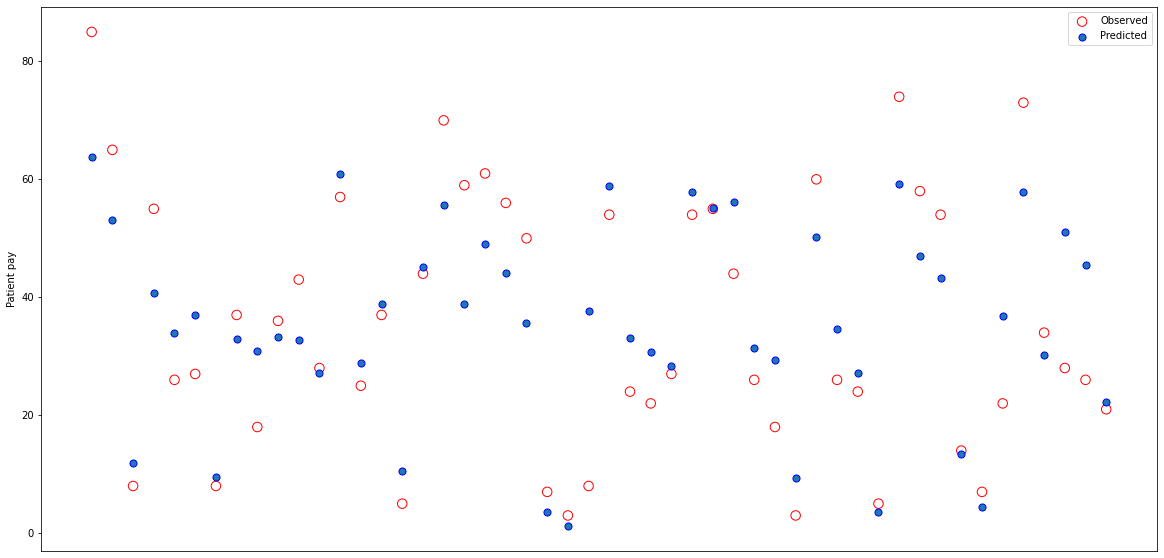

In [57]:
x1 = 0 #10000
x2 = 50 #10050
assert x2 < len(df_test), 'x is greater than length of df_test'
plt.figure(figsize=(20, 10))
plt.scatter(np.arange(x2 - x1), df_test.age.values[x1:x2], s=90, facecolors='none', edgecolors='r')
plt.scatter(np.arange(x2 - x1), pred[x1:x2], s=50, edgecolors='b')
plt.legend(['Observed', 'Predicted'])
plt.ylabel('Patient pay')
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    labelbottom=False) 

In [ ]:
np.array([df_test.age, pred]).T[:50]